# Hotel Reviews Classification Project P165

# ExcelR 

# Project Submitted by Team G3

### Mr. Aman Goutam
### Mr. Mimoh Raj
### Mr Vinay Kumar C
### Mysore Veerendra Chary
### Gourab Mishra

# <u>Business Objective:

## T and major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.


## ===================================================================== 

# 

# 1. <u> Import Necessery Libraries : - 

In [1]:
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# 

In [3]:
# To get output for all codes run in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# 

In [4]:
# Importing libraries for running different models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 

In [5]:
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatize the words

from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words

# 

# 2. <u> Loading Dataset and Its details : -

In [6]:
data = pd.read_excel("hotel_reviews.xlsx")
data

Review  Rating
0      nice hotel expensive parking got good deal sta...     4.0
1      ok nothing special charge diamond member hilto...     2.0
2      nice rooms not 4* experience hotel monaco seat...     3.0
3      unique, great stay, wonderful time hotel monac...     5.0
4      great stay great stay, went seahawk game aweso...     5.0
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...     5.0
20487  great location price view hotel great quick pl...     4.0
20488  ok just looks nice modern outside, desk staff ...     2.0
20489  hotel theft ruined vacation hotel opened sept ...     1.0
20490  people talking, ca n't believe excellent ratin...     2.0

[20491 rows x 2 columns]

# 

# 3. <u>EDA : -

In [7]:
data.shape
data.head(3)

(20491, 2)

Review  Rating
0  nice hotel expensive parking got good deal sta...     4.0
1  ok nothing special charge diamond member hilto...     2.0
2  nice rooms not 4* experience hotel monaco seat...     3.0

In [8]:
data.columns;data.info()

Index(['Review', 'Rating'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


## Finding duplicate reviews

In [9]:
new_Reviews = list(set(data.Review)) # removes duplicate reviews
len(new_Reviews)

20491

**No review has been duplicated**

## Finding Missing values

In [10]:
data.isnull().sum()
# no missing values in the data

Review    0
Rating    0
dtype: int64

## Combining Ratings to form 3 level ratings 

In [11]:
# for 5 level ratings frequency and proportion
data['Rating'].value_counts()
data['Rating'].value_counts(normalize=True)

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

5.0    0.441853
4.0    0.294715
3.0    0.106583
2.0    0.087502
1.0    0.069348
Name: Rating, dtype: float64

In [12]:
data['Rating_3levels'] = None
for index, rows in data.iterrows():
    if(rows['Rating'] >= 1 and rows['Rating'] < 3):
        data.at[index, 'Rating_3levels'] = 'Low'
    elif(rows['Rating'] == 3):
        data.at[index,'Rating_3levels'] = 'Medium'
    elif(rows['Rating'] > 3 and rows['Rating'] <= 5 ):
        data.at[index,'Rating_3levels'] = 'High'
data.head()

Review  Rating Rating_3levels
0  nice hotel expensive parking got good deal sta...     4.0           High
1  ok nothing special charge diamond member hilto...     2.0            Low
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium
3  unique, great stay, wonderful time hotel monac...     5.0           High
4  great stay great stay, went seahawk game aweso...     5.0           High

## Rating column

In [13]:
data.Rating_3levels.value_counts() # for 3-level ratings

High      15093
Low        3214
Medium     2184
Name: Rating_3levels, dtype: int64

# <u> Data Visualization : -

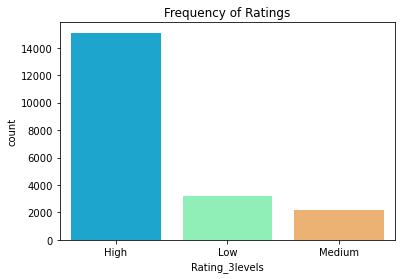

In [14]:
sns.countplot(x='Rating_3levels',data=data , palette='rainbow').set_title("Frequency of Ratings");

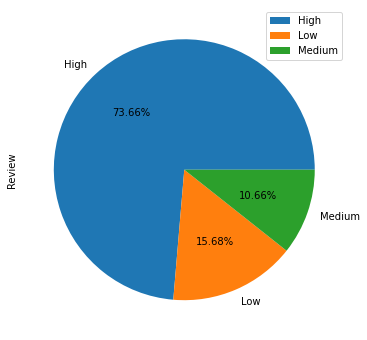

In [15]:
data.groupby("Rating_3levels").count().plot.pie(y="Review",autopct="%.2f%%",figsize=(6,6));

In [16]:
# finding length of the reviews
data['Length_Review'] = data['Review'].apply(len)
data.head()

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium   
3  unique, great stay, wonderful time hotel monac...     5.0           High   
4  great stay great stay, went seahawk game aweso...     5.0           High   

   Length_Review  
0            593  
1           1689  
2           1427  
3            600  
4           1281

In [17]:
data['Length_Review'].max() # the largest review has  13501 letters
data['Length_Review'].min() # the smallest has 44 letters

13501

44

In [18]:
fig = px.histogram(data, 
                   x='Length_Review', 
                   color='Rating_3levels', 
                   color_discrete_sequence=["#B6E880", "#FFA15A", "#FECB52", "#00CC96", "#EF553B"],
                   title="Review length distributions"
                  )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0,r=0,b=0)
)
# Distributions cannot be separated, are overlapping

# 4. <u>Text Pre-processing : -

In [19]:
# Replacing contractions (shorter vesions of words) with full word (n't , 'nt  as not)
for index, row in data.iterrows():
    phrase = row['Review']
    phrase = phrase.lower() #Convert to lowercase
    phrase = re.sub(r"n\'t", " not", phrase) # replace n't  with not
    phrase = re.sub(r"\'nt", " not", phrase) # replace 'nt  with not 
    data.at[index, 'Review_2'] = phrase
data.head(10)

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium   
3  unique, great stay, wonderful time hotel monac...     5.0           High   
4  great stay great stay, went seahawk game aweso...     5.0           High   
5  love monaco staff husband stayed hotel crazy w...     5.0           High   
6  cozy stay rainy city, husband spent 7 nights m...     5.0           High   
7  excellent staff, housekeeping quality hotel ch...     4.0           High   
8  hotel stayed hotel monaco cruise, rooms genero...     5.0           High   
9  excellent stayed hotel monaco past w/e delight...     5.0           High   

   Length_Review                                           Review_2  
0            593  nice hotel expensive parking got good deal sta...  
1           1689  ok nothing special charge diamond member hilto...  
2           1427  nice rooms not 4* experience hotel monaco seat...  
3            600  unique, great stay, wonderful time hotel monac...  
4           1281  great stay great stay, went seahawk game aweso...  
5           1002  love monaco staff husband stayed hotel crazy w...  
6            748  cozy stay rainy city, husband spent 7 nights m...  
7            597  excellent staff, housekeeping quality hotel ch...  
8            419  hotel stayed hotel monaco cruise, rooms genero...  
9            271  excellent stayed hotel monaco past w/e delight...

# TEXT NORMALIZATION   or PRE-PROCESSING

In [20]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english")) -set(["not"])
##Creating a list of custom stopwords
new_words = ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']
stop_words = stop_words.union(new_words)
corpus=[]
for index, row in data.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review_2']) # Remove punctuations    
    # text = text.lower() #Convert to lowercase
    text = re.sub("</?.*?>"," <> ",text)  # remove tags
    text = re.sub("(\\d|\\W)+"," ",text)  # remove special characters and digits
    text = text.split()  # Convert to list from string
    
    #Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word  in stop_words] 
    text_string = " ".join(text)
    corpus.append(text_string)
    data.at[index, 'clean_review'] = text_string
data.head(3)

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium   

   Length_Review                                           Review_2  \
0            593  nice hotel expensive parking got good deal sta...   
1           1689  ok nothing special charge diamond member hilto...   
2           1427  nice rooms not 4* experience hotel monaco seat...   

                                        clean_review  
0  nice expensive parking got good deal stay anni...  
1  ok nothing special charge diamond member hilto...  
2  nice not experience monaco seattle good not le...

In [22]:
corpus[0]

'nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view clean nice size bed comfortable woke stiff neck high pillow not soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'

In [23]:
data.drop(['Review_2'], axis=1,inplace=True)
data

Review  Rating  \
0      nice hotel expensive parking got good deal sta...     4.0   
1      ok nothing special charge diamond member hilto...     2.0   
2      nice rooms not 4* experience hotel monaco seat...     3.0   
3      unique, great stay, wonderful time hotel monac...     5.0   
4      great stay great stay, went seahawk game aweso...     5.0   
...                                                  ...     ...   
20486  best kept secret 3rd time staying charm, not 5...     5.0   
20487  great location price view hotel great quick pl...     4.0   
20488  ok just looks nice modern outside, desk staff ...     2.0   
20489  hotel theft ruined vacation hotel opened sept ...     1.0   
20490  people talking, ca n't believe excellent ratin...     2.0   

      Rating_3levels  Length_Review  \
0               High            593   
1                Low           1689   
2             Medium           1427   
3               High            600   
4               High           1281   
...              ...            ...   
20486           High            733   
20487           High            306   
20488            Low            443   
20489            Low           5557   
20490            Low            620   

                                            clean_review  
0      nice expensive parking got good deal stay anni...  
1      ok nothing special charge diamond member hilto...  
2      nice not experience monaco seattle good not le...  
3      unique great stay wonderful time monaco locati...  
4      great stay great stay went seahawk game awesom...  
...                                                  ...  
20486  best kept secret rd time staying charm not sta...  
20487  great location price view great quick place si...  
20488  ok look nice modern outside desk staff not par...  
20489  theft ruined vacation opened sept guest week h...  
20490  people talking not believe excellent rating no...  

[20491 rows x 5 columns]

In [24]:
# Finding total words in Cleaned review
clean_review_words = " ".join(data['clean_review'])
clean_review_words = clean_review_words.split()
len(clean_review_words) 

1943054

#### 1943054 words are present in cleaned reviews (includes duplicate words as well)

In [25]:
# finding frequency of all words 

words_all = len(clean_review_words)
words_all #1,943,054

word_dist = nltk.FreqDist(clean_review_words)

freq_data_all = pd.DataFrame(word_dist.most_common(words_all), columns=['Word','Frequency'])

freq_data_all['percentFreq_all'] =(freq_data_all.Frequency / freq_data_all.Frequency.sum())*100 
freq_data_all['percentFreq_unique'] =(freq_data_all.Frequency / len(freq_data_all))*100 

len(freq_data_all) #44,777
freq_data_all[0:10]

words_all_1= freq_data_all.Frequency.sum() 
words_all_1 # 1943054

# word "not" has not been removed from our list 
# we have total 1,943,054 words
# we have 44,777 unique words  

1943054

44777

Word  Frequency  percentFreq_all  percentFreq_unique
0       not      50776         2.613206          113.397503
1     great      21485         1.105734           47.982223
2      good      17491         0.900181           39.062465
3     staff      16706         0.859781           37.309333
4      stay      15601         0.802911           34.841548
5     night      14577         0.750211           32.554660
6       day      13484         0.693959           30.113674
7      time      12981         0.668072           28.990330
8      nice      12647         0.650883           28.244411
9  location      11560         0.594940           25.816826

1943054

# N-gram Analaysis

## Tokenisation

In [26]:
from nltk.tokenize import word_tokenize
corpusdata=data['clean_review'].apply(word_tokenize).tolist()
len(corpusdata),data.shape[0]

(20491, 20491)

In [27]:
corpusdata = np.asarray(corpusdata)
targets = np.asarray(data['Rating'].tolist())

In [28]:
data.Review[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [29]:
corpusdata[0]

['nice',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'review',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillow',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'night',
 'morning',
 'loud',
 'bang',
 'door',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 'parking',
 'night']

In [30]:
corpus1 = data[data['Rating_3levels'] == 'Low']['clean_review'].apply(word_tokenize).tolist()
corpus2 = data[data['Rating_3levels'] == 'Medium']['clean_review'].apply(word_tokenize).tolist()
corpus3 = data[data['Rating_3levels'] == 'High']['clean_review'].apply(word_tokenize).tolist()

In [31]:
def count_ngrams(corpusdata, n=2, ntop=None):
    ngrams = {}
    
    for clean_review in corpusdata:
        clean_review = tuple(clean_review)
        
        for i in range(0, len(clean_review) - n + 1): 
                # Get the n-gram from i to i+n
                ngram = clean_review[i:i+n]
                
                # check if the n-gram is in the dictionary
                if ngram in ngrams:
                    # Increment the count for this n-gram
                    ngrams[ngram] += 1
                else:
                    # Initialize this n-gram count to 1
                    ngrams[ngram] = 1
                    
    ngrams = pd.DataFrame.from_dict(ngrams, orient='index', columns=['count']).sort_values('count', ascending=False)
    
    ngrams.reset_index(inplace=True)
    
    ngrams['index'] = ngrams['index'].str.join(', ')
    
    
    if (ntop):
        ngrams = ngrams[:ntop]    
        
    return ngrams

# Uni-grams

In [32]:
uni_grams1 = count_ngrams(corpus1, n=1, ntop=10)
uni_grams2 = count_ngrams(corpus2, n=1,ntop=10)
uni_grams3 = count_ngrams(corpus3, n=1,ntop=10)

uni_grams1['Rating_3levels'] = '1Low'
uni_grams2['Rating_3levels'] = '2Medium'
uni_grams3['Rating_3levels'] = '3High'


unigrams = pd.concat([ uni_grams3, uni_grams2, uni_grams1])
import plotly.express as px
from plotly.subplots import make_subplots
fig = px.bar(unigrams, x="index", y="count", color="Rating_3levels", facet_col="Rating_3levels", title='Unigrams of Reviews Rating-wise' ,
             color_continuous_scale=[ "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
# words like not, great , staff ,etc are found in all 3 Ratings
# for Rating-1, we have words like food, resort , service - when we look at original reviews say about food ('cold food')

# Bi-grams

In [33]:
bi_grams1 = count_ngrams(corpus1,n=2,ntop=10)
bi_grams2 = count_ngrams(corpus2, n=2,ntop=10)
bi_grams3 = count_ngrams(corpus3, n=2,ntop=10)

bi_grams1['Rating_3levels'] = '1Low'
bi_grams2['Rating_3levels'] = '2Medium'
bi_grams3['Rating_3levels'] = '3High'

bigrams = pd.concat([ bi_grams3, bi_grams2, bi_grams1])
fig = px.bar(bigrams, x="index", y="count", color="Rating_3levels", facet_col="Rating_3levels",  title='Bigrams of Reviews Rating-wise' ,
             color_continuous_scale=[ "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
# 

# Tri-grams

In [34]:
tri_grams1 = count_ngrams(corpus1, n=3, ntop=10)
tri_grams2 = count_ngrams(corpus2, n=3, ntop=10)
tri_grams3 = count_ngrams(corpus3, n=3, ntop=10)

tri_grams1['Rating_3levels'] = '1Low'
tri_grams2['Rating_3levels'] = '2Medium'
tri_grams3['Rating_3levels'] = '3High'


tri_grams = pd.concat([ tri_grams3, tri_grams2, tri_grams1])
fig = px.bar(tri_grams, x="index", y="count", color="Rating_3levels", facet_col="Rating_3levels", title='Trigrams of Reviews Rating-wise' ,
             color_continuous_scale=["#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)

# Visualizing positive and negative words using wordcloud

In [35]:
# Finding total words in Cleaned review
clean_review_words = " ".join(data['clean_review'])
clean_review_words = clean_review_words.split()
len(clean_review_words) 
clean_review_words[0:10]

1943054

['nice',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'anniversary',
 'arrived',
 'late']

# Word Cloud - all words

In [36]:
# !pip install wordcloud

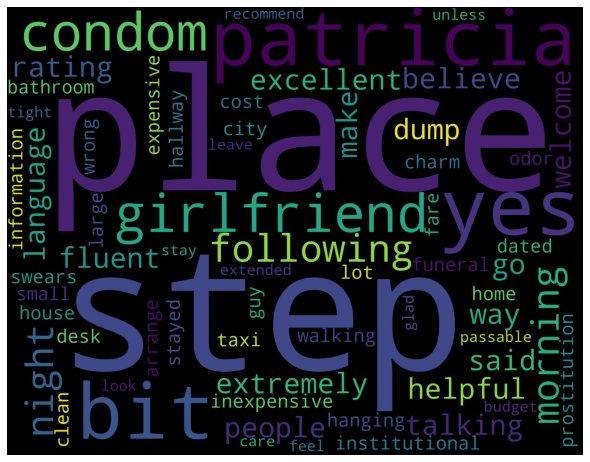

In [37]:
from wordcloud import WordCloud

wordcloud_all = WordCloud(background_color='black', width=1800, height=1400, max_words=100).generate(text_string)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_all) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

# Positive Word Cloud

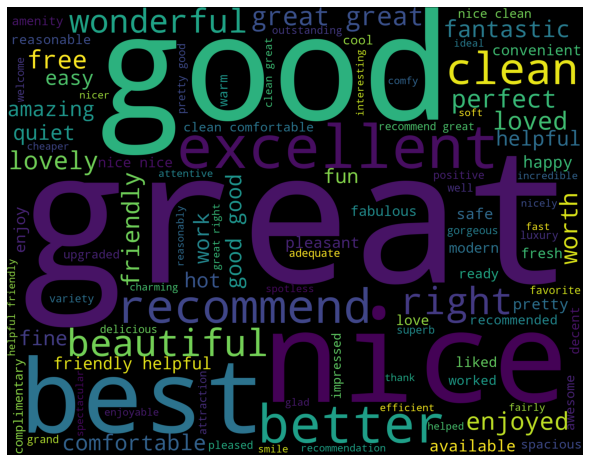

In [38]:
# Using positive words 
with open('positive-words.txt','r') as pos:
    poswords = pos.read().split("\n")
poswords = poswords[35:]
poswords[0:6]
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable']
text_pos = " ".join([w for w in clean_review_words if w in poswords])
text_pos[0:10]
'exceptiona'
from wordcloud import WordCloud
wordcloud_pos = WordCloud(background_color='black', width=1800, height=1400, max_words=100).generate(text_pos)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

# Negative Word Cloud

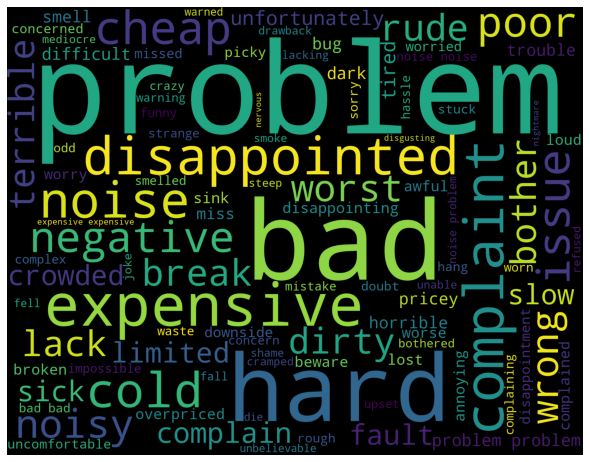

In [39]:
# Using Negative words

with open ('negative-words.txt','r') as neg:
    negwords = neg.read().split("\n")
negwords = negwords[35:]
negwords[0:6]
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably']
text_neg = " ".join ([w for w in clean_review_words if w in negwords])

wordcloud_neg = WordCloud(background_color='black', width=1800, height=1400, max_words=100).generate(text_neg)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

# 

# 5. <u>Sentiment Analysis : -

<Figure size 720x720 with 0 Axes>

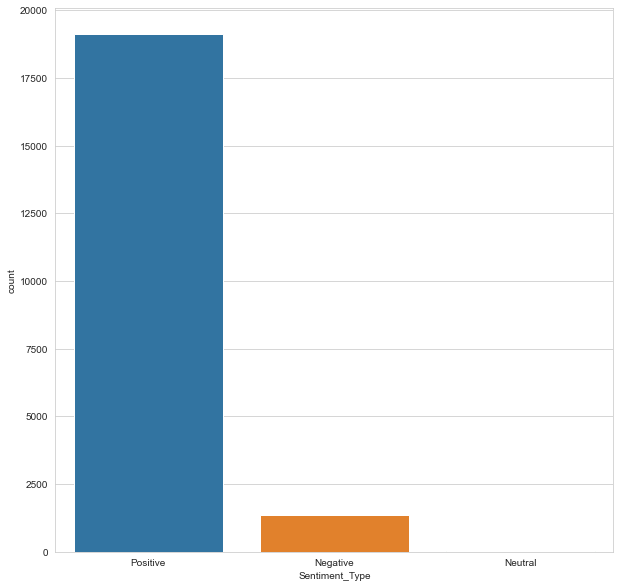

In [40]:
from textblob import TextBlob
# conda install -c conda-forge textblob
bloblist_desc = list()

data_clean_review_str=data['clean_review'].astype(str)
for row in data_clean_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(data_polarity_desc):
    if data_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif data_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data_polarity_desc['Sentiment_Type'] = data_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_polarity_desc)

# there are a large number of positive sentiments, very less negative, and very very less neutral sentiments 

# Sentiment Analysis Using VADER ( Valence Aware Dictionary for sEntiment Reasoning )  

* VADER is a less resource-consuming sentiment analysis model that uses a set of rules to specify a mathematical model without explicitly coding it. VADER consumes fewer resources as compared to Machine Learning models as there is no need for vast amounts of training data.



* VADER’s resource-efficient approach helps us to decode and quantify the emotions contained in streaming media such as text, audio or video. VADER doesn’t suffer severely from a speed-performance tradeoff.

In [41]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["Review"].apply(lambda x: sid.polarity_scores(x))

data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

data.head()

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium   
3  unique, great stay, wonderful time hotel monac...     5.0           High   
4  great stay great stay, went seahawk game aweso...     5.0           High   

   Length_Review                                       clean_review    neg  \
0            593  nice expensive parking got good deal stay anni...  0.072   
1           1689  ok nothing special charge diamond member hilto...  0.110   
2           1427  nice not experience monaco seattle good not le...  0.081   
3            600  unique great stay wonderful time monaco locati...  0.060   
4           1281  great stay great stay went seahawk game awesom...  0.135   

     neu    pos  compound  
0  0.643  0.285    0.9747  
1  0.701  0.189    0.9787  
2  0.700  0.219    0.9889  
3  0.555  0.385    0.9912  
4  0.643  0.221    0.9797

In [43]:
# add number of characters columns
data["nb_chars"] = data["Review"].apply(lambda x: len(x))

In [44]:
# add number of words column
data["nb_words"] = data["Review"].apply(lambda x: len(x.split(" ")))

data.head()

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium   
3  unique, great stay, wonderful time hotel monac...     5.0           High   
4  great stay great stay, went seahawk game aweso...     5.0           High   

   Length_Review                                       clean_review    neg  \
0            593  nice expensive parking got good deal stay anni...  0.072   
1           1689  ok nothing special charge diamond member hilto...  0.110   
2           1427  nice not experience monaco seattle good not le...  0.081   
3            600  unique great stay wonderful time monaco locati...  0.060   
4           1281  great stay great stay went seahawk game awesom...  0.135   

     neu    pos  compound  nb_chars  nb_words  
0  0.643  0.285    0.9747       593        89  
1  0.701  0.189    0.9787      1689       252  
2  0.700  0.219    0.9889      1427       219  
3  0.555  0.385    0.9912       600        91  
4  0.643  0.221    0.9797      1281       193

In [45]:
# highest positive sentiment reviews (with more than 5 words)
data[data["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

Review    pos
13123  perfect, impressive place, want clean comfy ro...  0.818
4073   hotel great hotel great money clean good restu...  0.799
15066  regular, amazing value, stay hotel let, great ...  0.796
10778  fantastic value money good value money, great ...  0.792
7709   great hotel loved hotel, location perfect staf...  0.787
598    incredible value great price expedia package, ...  0.777
10819  truely fantastic hotel great hotel, staff supe...  0.765
2346   best hotel, hotel gorgeous, beautiful clean sp...  0.763
5175   fabulous trip stayed just night wish longer, h...  0.757
7240   wonderful hotel perfect place stay excellent l...  0.756

## Most Positive Sentiment reviews based on Compound scores

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

* positive sentiment : (compound score >= 0.05) 
* neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 
* negative sentiment : (compound score <= -0.05)

In [46]:
# highest positive sentiment reviews (with more than 5 words)
data[data["nb_words"] >= 5].sort_values("compound", ascending = False)[["Review", "pos","compound"]].head(10)

Review    pos  compound
18917  ocean blue excellent resort, boyfriend mid-20_...  0.324    0.9999
2967   bravo bavaro knew not five-star hotel incredib...  0.234    0.9998
3211   melia caribe wonderful, just returned wonderfu...  0.244    0.9998
7074   great weather time secrets husband couple frie...  0.382    0.9998
18911  vacation make husband stayed ocean blue septem...  0.221    0.9998
14116  ca n't wait till year, 2nd 16th 2008we stayed ...  0.318    0.9998
6618   superb, spent 2 weeks 13/03-27/03 hotel absolu...  0.340    0.9998
2980   ca n't wait, time dominican republic staying b...  0.277    0.9998
16617  perfect days paradise, waited home write guest...  0.232    0.9997
6867   absolutely perfect way, excellence excellente,...  0.410    0.9997

In [47]:
# lowest negative sentiment reviews (with more than 5 words)
data[data["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

Review    neg
9514   bad hotel really awful place dirty room rude s...  0.646
19891  bad bad bad hotel verry bad pls not stay, clos...  0.645
65     hated inn terrible, room-service horrible staf...  0.544
4280   hurry leave, really sucks, terrible food cold,...  0.529
4740   worn noisy worn noisy, remodel future, prices ...  0.527
14190  extremely disappointing experience disappointi...  0.507
6484   poor quality, stay absolutely, terrible sound ...  0.488
16633  worst hotel room awful no windows poor lightin...  0.477
14843  bad bad lie, n't believe photo hotel web site,...  0.476
16240  eh, no didnt like room hotel super small does ...  0.461

## Most Negative Sentiment Reviews based on Compound Scores

In [48]:
# lowest negative sentiment reviews (with more than 5 words)
data[data["nb_words"] >= 5].sort_values("compound", ascending = True)[["Review", 'neg',"compound"]].head(10)

Review    neg  compound
6453   414 hotel worst accomodation experience life, ...  0.180   -0.9974
3865   natura park vacation hell, natura park revieww...  0.158   -0.9946
17774  dreams nightmares husband second time resort, ...  0.315   -0.9941
6046   great vomiting pass june 16 june 23 family lef...  0.187   -0.9932
18494  majestic hotel putan cana-awful assuming peopl...  0.275   -0.9923
6922   ok not great told excellence punta cana best e...  0.232   -0.9912
13842  traveler beware worse hotel not all-inclusive ...  0.186   -0.9911
181    worst hotel experience thinking booking room h...  0.265   -0.9902
12517  horrible experience terrible service experienc...  0.268   -0.9897
2042   gross problems hotel, town wedding just wanted...  0.302   -0.9894

# 6. <u>Named Entity Recognition / Entity Extraction : -

In [49]:
# conda install -c conda-forge spacy-model-en_core_web_sm

In [50]:
import spacy
nlp = spacy.load('en_core_web_sm')

### Let’s find out the most frequent named entities in our corpus. For this, we will build a data frame consisting of all the named entities and their types.

In [51]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

## To find top occuring entities and their types

In [52]:
# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:20]

0      1     2        3        4        5         6   \
Entity Name   second  paris  week  english  evening  morning  american   
Entity Type  ORDINAL    GPE  DATE     NORP     TIME     TIME      NORP   
Frequency       1322   1044  1032      976      912      873       866   

                  7         8       9          10        11     12    13  \
Entity Name  italian   english  french  dominican  san juan  night   day   
Entity Type     NORP  LANGUAGE    NORP       NORP       GPE   TIME  DATE   
Frequency        719       711     700        686       683    633   631   

                   14      15        16     17        18        19  
Entity Name  european  london       one  daily  new york  japanese  
Entity Type      NORP     GPE  CARDINAL   DATE       GPE      NORP  
Frequency         617     597       596    553       517       506

In [53]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

0      1     2     3       4     5        6         7     8   \
Entity Type    GPE   DATE  NORP  TIME  PERSON   ORG  ORDINAL  CARDINAL   LOC   
Frequency    12591  10789  8507  8180    5341  4625     1882      1856  1124   

                   9    10     11        12       13           14  
Entity Type  LANGUAGE  FAC  EVENT  QUANTITY  PRODUCT  WORK_OF_ART  
Frequency         791  335    129       106       66           59

# 7. <u>Topic Modelling using LDA : -

In [54]:
# !pip install pyLDAvis

In [55]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import gensim
import pyLDAvis.gensim_models

In [56]:
pyLDAvis.enable_notebook()

In [57]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(corpusdata, min_count=10)
trigram = Phrases(corpusdata, min_count=10)

In [58]:
for idx in range(len(corpusdata)):
    for token in bigram[corpusdata[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            corpusdata[idx].append(token)
    for token in trigram[corpusdata[idx]]:
        if '_' in token:
            # Token is a trigram, add to document.
            corpusdata[idx].append(token)

In [59]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(corpusdata)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 48145
Number of unique words after removing rare and common words: 11413


In [60]:
#Creating term document matrix
corpus_1 = [dictionary.doc2bow(doc) for doc in corpusdata]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus_1))

Number of unique tokens: 11413
Number of documents: 20491


In [61]:
# Set training parameters.
num_topics = 4
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0] # load dictionary
id2word = dictionary.id2token


model = LdaModel(corpus=corpus_1, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every,random_state=12)

In [62]:
viz = pyLDAvis.gensim_models.prepare(model, corpus_1, dictionary)
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.075387  0.092239       1        1  31.004208
2     -0.170137  0.115223       2        1  28.631047
1     -0.049881 -0.254406       3        1  28.267189
0      0.295405  0.046944       4        1  12.097556, topic_info=                  Term          Freq         Total Category  logprob  loglift
5024             beach  10120.000000  10120.000000  Default  30.0000  30.0000
4987            resort   9051.000000   9051.000000  Default  29.0000  29.0000
923   highly_recommend   3216.000000   3216.000000  Default  28.0000  28.0000
2081       minute_walk   5051.000000   5051.000000  Default  27.0000  27.0000
9380        punta_cana   5171.000000   5171.000000  Default  26.0000  26.0000
...                ...           ...           ...      ...      ...      ...
49              review   1262.260465   4699.831202   Topic4  -5.2504   0.7975
1564        absolutely    832.889708   1555.423477   Topic4  -5.6662   1.4876
12         comfortable    916.550448   4356.028698   Topic4  -5.5704   0.5535
588               home    825.537759   2138.279372   Topic4  -5.6750   1.1604
477         definitely    833.874682   3073.774234   Topic4  -5.6650   0.8076

[278 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
1564      1  0.309883        absolutely
1564      2  0.100294        absolutely
1564      3  0.054647        absolutely
1564      4  0.535545        absolutely
4912      4  0.999272  absolutely_loved
...     ...       ...               ...
898       1  0.368713              year
898       2  0.220359              year
898       3  0.044382              year
898       4  0.366540              year
3748      4  0.998888              york

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

# Exploring 4 Key Topics - 5 level rating

In [63]:
def explore_topic(lda_model, topic_number, topn, output=True):
    
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:40} {:.3f}'.format(term, round(frequency, 3)))
    
    return terms

In [64]:
topic_summaries = []
print(u'{:40} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(model,topic_number=i, topn=10, output=True )
#     print tmp[:5]
    topic_summaries += [tmp[:10]]


term                                     frequency

Topic 0 |---------------------

highly_recommend                         0.013
wonderful                                0.009
new_york                                 0.008
fantastic                                0.007
trip                                     0.007
loved                                    0.006
trip_advisor                             0.006
bali                                     0.006
perfect                                  0.006
new                                      0.006
Topic 1 |---------------------

minute_walk                              0.009
staff_friendly                           0.008
city                                     0.007
minute                                   0.006
comfortable                              0.006
station                                  0.006
walking_distance                         0.006
street                                   0.005
modern                                

<Figure size 576x504 with 0 Axes>

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<AxesSubplot:xlabel='Rating', ylabel='count'>

Text(0.5, 1.0, 'Topics Distribution by rating')

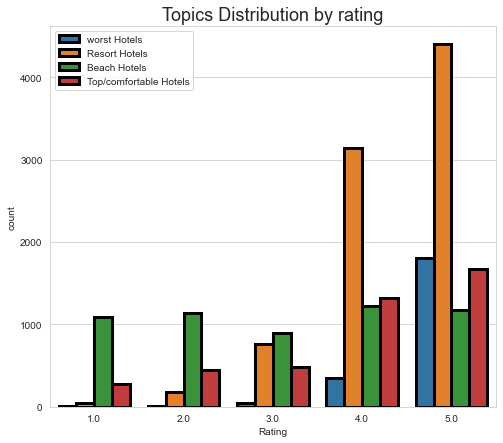

<Figure size 576x504 with 0 Axes>

[Text(0, 0, 'Worst hotels'),
 Text(1, 0, 'Resort Hotels'),
 Text(2, 0, 'Beach Hotels'),
 Text(3, 0, 'Top/comfortable Hotels')]

Text(0.5, 1.0, 'Topics Distribution')

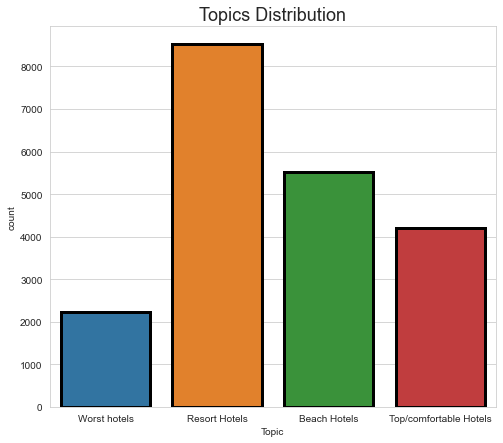

In [65]:
# attach topics to data
all_topics = model.get_document_topics(corpus_1, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
data['Topic'] = all_topics_numpy.argmax(axis=1)

# plot topics distribution by rating
plt.figure(figsize=(8,7))
sns.countplot(data=data,x="Rating",hue="Topic",edgecolor="black",linewidth=3)
plt.legend(['worst Hotels',"Resort Hotels","Beach Hotels","Top/comfortable Hotels"])
plt.title('Topics Distribution by rating',size=18)
plt.show()

# plot topics distribution 
plt.figure(figsize=(8,7))
ax=sns.countplot(data=data,x="Topic",edgecolor="black",linewidth=3)
ax.set_xticklabels(['Worst hotels',"Resort Hotels","Beach Hotels","Top/comfortable Hotels"])
plt.title('Topics Distribution',size=18)
plt.show()


# Exploring 4 Key Topics - 3 level rating

<Figure size 576x504 with 0 Axes>

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<AxesSubplot:xlabel='Rating_3levels', ylabel='count'>

Text(0.5, 1.0, 'Topics Distribution by rating')

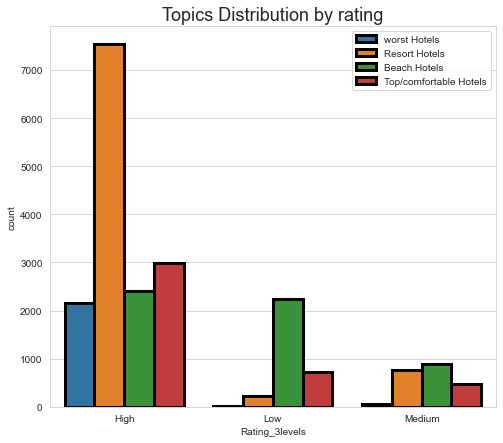

<Figure size 576x504 with 0 Axes>

[Text(0, 0, 'Worst hotels'),
 Text(1, 0, 'Resort Hotels'),
 Text(2, 0, 'Beach Hotels'),
 Text(3, 0, 'Top/comfortable Hotels')]

Text(0.5, 1.0, 'Topics Distribution')

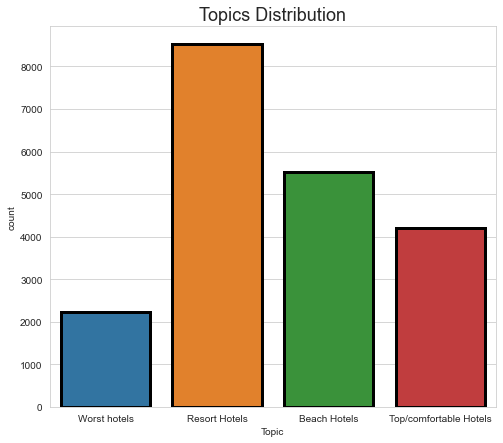

In [66]:
# attach topics to data
all_topics = model.get_document_topics(corpus_1, minimum_probability=0.0)
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_numpy = all_topics_csr.T.toarray()
data['Topic'] = all_topics_numpy.argmax(axis=1)

# plot topics distribution by rating
plt.figure(figsize=(8,7))
sns.countplot(data=data,x="Rating_3levels",hue="Topic",edgecolor="black",linewidth=3)
plt.legend(['worst Hotels',"Resort Hotels","Beach Hotels","Top/comfortable Hotels"])
plt.title('Topics Distribution by rating',size=18)
plt.show()

# plot topics distribution 
plt.figure(figsize=(8,7))
ax=sns.countplot(data=data,x="Topic",edgecolor="black",linewidth=3)
ax.set_xticklabels(['Worst hotels',"Resort Hotels","Beach Hotels","Top/comfortable Hotels"])
plt.title('Topics Distribution',size=18)
plt.show()


# Tfidf for train dataset

In [67]:
# get clean-review text column as list
clean_review_list = data['clean_review'].tolist()
type(clean_review_list)
clean_review_list[0]

list

'nice expensive parking got good deal stay anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view clean nice size bed comfortable woke stiff neck high pillow not soundproof like heard music night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay parking night'

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(min_df=750)

In [69]:
tfidfconverter = TfidfVectorizer(max_features=3000)
tfidf_all = tfidfconverter.fit_transform(clean_review_list).toarray()

tfidf_all_names = tfidfconverter.get_feature_names() ; tfidf_all_names[:5]

tfidf_all.shape 
# there are 14343 rows/documents and 429 terms have been generated

tfidf_all_vector =pd.DataFrame(tfidf_all, columns=tfidf_all_names)
tfidf_all_vector.head(3)
# 3000 terms 


['able', 'absolute', 'absolutely', 'ac', 'accept']

(20491, 3000)

able  absolute  absolutely        ac  accept  acceptable  accepted  access  \
0   0.0       0.0         0.0  0.000000     0.0         0.0       0.0     0.0   
1   0.0       0.0         0.0  0.068832     0.0         0.0       0.0     0.0   
2   0.0       0.0         0.0  0.086688     0.0         0.0       0.0     0.0   

   accessible  accommodate  ...  yoghurt  yogurt  york  young  younger   yr  \
0         0.0          0.0  ...      0.0     0.0   0.0    0.0      0.0  0.0   
1         0.0          0.0  ...      0.0     0.0   0.0    0.0      0.0  0.0   
2         0.0          0.0  ...      0.0     0.0   0.0    0.0      0.0  0.0   

   yummy  zero  zone  zoo  
0    0.0   0.0   0.0  0.0  
1    0.0   0.0   0.0  0.0  
2    0.0   0.0   0.0  0.0  

[3 rows x 3000 columns]

In [70]:
import pickle
pickle_out=open('vectorizer.pkl','wb')
pickle.dump(tfidfconverter,pickle_out)
pickle_out.close()

# Model Building

In [71]:
y = data.Rating_3levels ;
y.shape
y.head()

(20491,)

0      High
1       Low
2    Medium
3      High
4      High
Name: Rating_3levels, dtype: object

In [72]:
data.head()

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   
2  nice rooms not 4* experience hotel monaco seat...     3.0         Medium   
3  unique, great stay, wonderful time hotel monac...     5.0           High   
4  great stay great stay, went seahawk game aweso...     5.0           High   

   Length_Review                                       clean_review    neg  \
0            593  nice expensive parking got good deal stay anni...  0.072   
1           1689  ok nothing special charge diamond member hilto...  0.110   
2           1427  nice not experience monaco seattle good not le...  0.081   
3            600  unique great stay wonderful time monaco locati...  0.060   
4           1281  great stay great stay went seahawk game awesom...  0.135   

     neu    pos  compound  nb_chars  nb_words  Topic  
0  0.643  0.285    0.9747       593        89      2  
1  0.701  0.189    0.9787      1689       252      2  
2  0.700  0.219    0.9889      1427       219      2  
3  0.555  0.385    0.9912       600        91      1  
4  0.643  0.221    0.9797      1281       193      2

In [73]:
# # Splitting dataset in 80:20 ratio
# frpm previous models. found this ratio to give good results
X_train1,X_test1,y_train1,y_test1 = train_test_split(tfidf_all_vector,y,test_size=0.20,random_state=123,stratify=y)
X_train1.shape 
X_test1.shape 
y.shape  

(16392, 3000)

(4099, 3000)

(20491,)

# Support Vector Machines

Accuracy score on train data: 0.966447047340166
F1 macro score on train data: 0.9318399019568265
              precision    recall  f1-score   support

        High       0.96      1.00      0.98     12074
         Low       0.97      0.97      0.97      2571
      Medium       0.99      0.74      0.84      1747

    accuracy                           0.97     16392
   macro avg       0.97      0.90      0.93     16392
weighted avg       0.97      0.97      0.96     16392



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



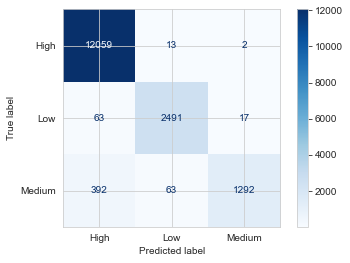

Accuracy score on test data: 0.8631373505733105
F1 macro score on test data: 0.6388363386308958
              precision    recall  f1-score   support

        High       0.88      0.99      0.93      3019
         Low       0.81      0.79      0.80       643
      Medium       0.59      0.11      0.18       437

    accuracy                           0.86      4099
   macro avg       0.76      0.63      0.64      4099
weighted avg       0.84      0.86      0.83      4099



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



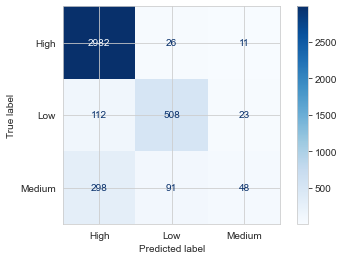

In [74]:
# Running the model on train data and validating on validation data

from sklearn.svm import SVC
model_svm = SVC(random_state=123)
model_svm.fit(X_train1,y_train1)


# for training data
y_pred_train = model_svm.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
# print(confusion_matrix(y_train1,y_pred_train))
plot_confusion_matrix(model_svm, X_train1,y_train1,cmap=plt.cm.Blues); plt.show();

# for test data 
y_pred_test = model_svm.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
# print(confusion_matrix(y_test1,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_svm, X_test1,y_test1,cmap=plt.cm.Blues); plt.show();

# Multinomial Naive Bayes

Accuracy score on train data: 0.8318081991215227
F1 macro score on train data: 0.5477186489283691
              precision    recall  f1-score   support

        High       0.83      0.99      0.90     12074
         Low       0.85      0.64      0.73      2571
      Medium       0.64      0.01      0.01      1747

    accuracy                           0.83     16392
   macro avg       0.77      0.55      0.55     16392
weighted avg       0.81      0.83      0.78     16392



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



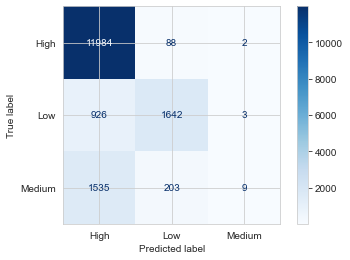

Accuracy score on test data: 0.8250792876311296
F1 macro score on test data: 0.5332889276987912
              precision    recall  f1-score   support

        High       0.82      0.99      0.90      3019
         Low       0.83      0.60      0.69       643
      Medium       0.50      0.00      0.00       437

    accuracy                           0.83      4099
   macro avg       0.72      0.53      0.53      4099
weighted avg       0.79      0.83      0.77      4099



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



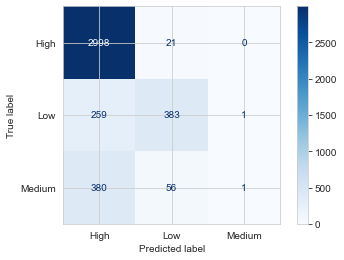

In [75]:
# Running the model on train data and validating on validation data

from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
model_mnb.fit(X_train1,y_train1)

# for training data
y_pred_train = model_mnb.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
# print(confusion_matrix(y_train1,y_pred_train))
plot_confusion_matrix(model_mnb, X_train1,y_train1,cmap=plt.cm.Blues); plt.show();

# for test data 
y_pred_test = model_mnb.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
# print(confusion_matrix(y_test1,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_mnb, X_test1,y_test1,cmap=plt.cm.Blues); plt.show();


# K- Neighbors Classifier

Accuracy score on train data: 0.8117984382625671
F1 macro score on train data: 0.5394135090047224
              precision    recall  f1-score   support

        High       0.81      0.99      0.89     12074
         Low       0.82      0.48      0.61      2571
      Medium       0.63      0.07      0.12      1747

    accuracy                           0.81     16392
   macro avg       0.75      0.51      0.54     16392
weighted avg       0.79      0.81      0.77     16392



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



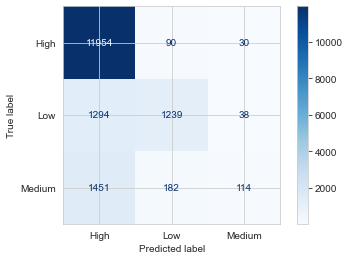

Accuracy score on test data: 0.7977555501341791
F1 macro score on test data: 0.5004426116747136
              precision    recall  f1-score   support

        High       0.80      0.99      0.88      3019
         Low       0.79      0.42      0.55       643
      Medium       0.45      0.03      0.06       437

    accuracy                           0.80      4099
   macro avg       0.68      0.48      0.50      4099
weighted avg       0.76      0.80      0.75      4099



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



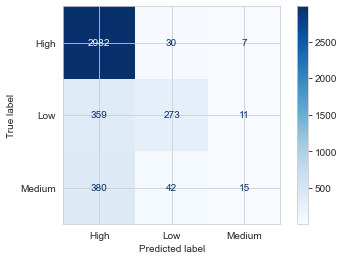

In [76]:
# KNN on tfidf using  n_neighbors=11
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train1,y_train1)

# for training data
y_pred_train = model_knn.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
# print(confusion_matrix(y_train1,y_pred_train))
plot_confusion_matrix(model_knn, X_train1,y_train1,cmap=plt.cm.Blues); plt.show();

# for test data 
y_pred_test = model_knn.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
# print(confusion_matrix(y_test1,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_knn, X_test1,y_test1,cmap=plt.cm.Blues); plt.show();

# Decision Tree

Accuracy score on train data: 1.0
F1 macro score on train data: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     12074
         Low       1.00      1.00      1.00      2571
      Medium       1.00      1.00      1.00      1747

    accuracy                           1.00     16392
   macro avg       1.00      1.00      1.00     16392
weighted avg       1.00      1.00      1.00     16392



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



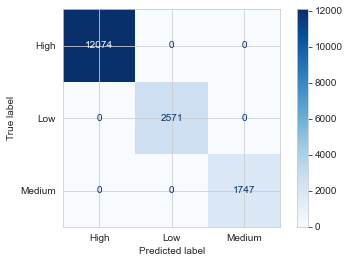

Accuracy score on test data: 0.7277384727982434
F1 macro score on test data: 0.522650387734915
              precision    recall  f1-score   support

        High       0.84      0.85      0.85      3019
         Low       0.53      0.52      0.52       643
      Medium       0.20      0.20      0.20       437

    accuracy                           0.73      4099
   macro avg       0.52      0.52      0.52      4099
weighted avg       0.73      0.73      0.73      4099



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



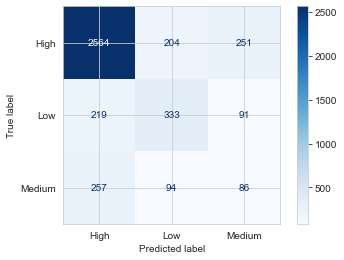

In [77]:
# Using DT functions criterion='entropy',max_features=2000

model_dt = DecisionTreeClassifier(criterion='entropy',max_features=2000,random_state=123)
model_dt.fit(X_train1, y_train1)

# for training data
y_pred_train = model_dt.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
# print(confusion_matrix(y_train1,y_pred_train))
plot_confusion_matrix(model_dt, X_train1,y_train1,cmap=plt.cm.Blues); plt.show();

# for test data 
y_pred_test = model_dt.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
# print(confusion_matrix(y_test1,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_dt, X_test1,y_test1,cmap=plt.cm.Blues); plt.show();

# Random Forest

RandomForestClassifier(criterion='entropy', n_jobs=2, oob_score=True,
                       random_state=123)

Accuracy score on train data: 1.0
F1 macro score on train data: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     12074
         Low       1.00      1.00      1.00      2571
      Medium       1.00      1.00      1.00      1747

    accuracy                           1.00     16392
   macro avg       1.00      1.00      1.00     16392
weighted avg       1.00      1.00      1.00     16392



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



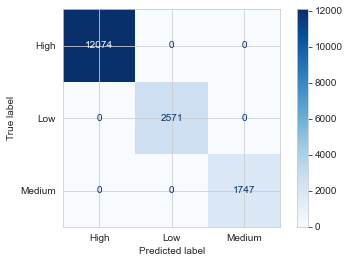

Accuracy score on test data: 0.8160526957794584
F1 macro score on test data: 0.5151397646244154
              precision    recall  f1-score   support

        High       0.81      1.00      0.89      3019
         Low       0.88      0.52      0.65       643
      Medium       0.00      0.00      0.00       437

    accuracy                           0.82      4099
   macro avg       0.56      0.50      0.52      4099
weighted avg       0.73      0.82      0.76      4099



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



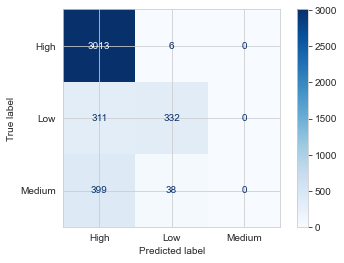

0.8122864812103465

In [78]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100, criterion='entropy', random_state=123)
model_rf.fit(X_train1, y_train1)

# for training data
y_pred_train = model_rf.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
# print(confusion_matrix(y_train1,y_pred_train))
plot_confusion_matrix(model_rf, X_train1,y_train1,cmap=plt.cm.Blues); plt.show();

# for test data 
y_pred_test = model_rf.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
# print(confusion_matrix(y_test1,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_rf, X_test1,y_test1,cmap=plt.cm.Blues); plt.show();

model_rf.oob_score_


# FINAL MODEL CHOSEN

# Tfidf and Multinomial logistic regression using 3000 features

Accuracy score on train data: 0.8980600292825769
F1 macro score on train data: 0.763068337909636
              precision    recall  f1-score   support

        High       0.91      0.99      0.95     12074
         Low       0.87      0.86      0.86      2571
      Medium       0.78      0.35      0.48      1747

    accuracy                           0.90     16392
   macro avg       0.85      0.73      0.76     16392
weighted avg       0.89      0.90      0.88     16392



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



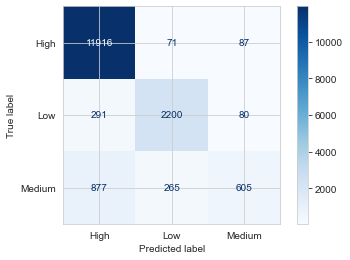

Accuracy score on test data: 0.8633813125152476
F1 macro score on test data: 0.6616270203077373
              precision    recall  f1-score   support

        High       0.89      0.98      0.93      3019
         Low       0.80      0.79      0.80       643
      Medium       0.54      0.17      0.26       437

    accuracy                           0.86      4099
   macro avg       0.74      0.65      0.66      4099
weighted avg       0.84      0.86      0.84      4099



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



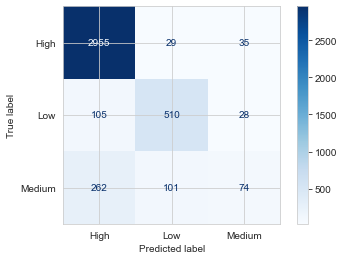

In [79]:
# Running the model on train data and validating on validation data

model_log = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log.fit(X_train1,y_train1)


# for training data
y_pred_train = model_log.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
# print(confusion_matrix(y_train1,y_pred_train))
plot_confusion_matrix(model_log, X_train1,y_train1,cmap=plt.cm.Blues); plt.show();

# for test data 
y_pred_test = model_log.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
# print(confusion_matrix(y_test1,y_pred_test))

# plotting confusion matrix
plot_confusion_matrix(model_log, X_test1,y_test1,cmap=plt.cm.Blues); plt.show();

# Multinomial logistic regression on full data - cross validation (kfold=10)

In [80]:
# Multinomial logistic regression on full data -  cross validation (kfold=10)
kfold = KFold(n_splits=10, shuffle=True)
scoring = "f1_macro"

results_X = cross_val_score(LogisticRegression(random_state=123,multi_class='multinomial',
                                             solver='newton-cg'), tfidf_all_vector, y, cv=kfold,scoring=scoring)
print("F1-macro score for Multinomial logistic regression: %.2f%% (%.2f%%)" % (results_X.mean()*100, results_X.std()*100)) 

# F1-macro score : 66.74% (1.88%)

F1-macro score for Multinomial logistic regression: 67.51% (1.54%)


In [81]:
print("F1-macro score for Multinomial logistic regression: %.2f%% (%.2f%%)" % (results_X.mean()*100, results_X.std()*100)) 

F1-macro score for Multinomial logistic regression: 67.51% (1.54%)


In [83]:
tfidf_all_vector.shape # (14343, 3000)
tfidf_test_vector.shape # (6148, 3000)

(20491, 3000)

NameError: name 'tfidf_test_vector' is not defined

# 

# Test data

In [84]:
data_test = pd.read_csv("test.csv")

In [85]:
data_test.shape
data_test.head(3)
# 6148 and 2 

(6148, 2)

ID                                             Review
0   0  just superb rendezvous just perfect property s...
1   1  better close staten island ferry easy subway, ...
2   2  enjoyed stay, just come long weekend barcelona...

# Preprocessing of test data

In [86]:
# Replacing contractions (shorter vesions of words) with full word (n't , 'nt  as not)
for index, row in data_test.iterrows():
    phrase = row['Review']
    phrase = phrase.lower() #Convert to lowercase
    phrase = re.sub(r"n\'t", " not", phrase) # replace n't  with not
    phrase = re.sub(r"\'nt", " not", phrase) # replace 'nt  with not 
    data_test.at[index, 'Review_2'] = phrase
data_test[0:3]

ID                                             Review  \
0   0  just superb rendezvous just perfect property s...   
1   1  better close staten island ferry easy subway, ...   
2   2  enjoyed stay, just come long weekend barcelona...   

                                            Review_2  
0  just superb rendezvous just perfect property s...  
1  better close staten island ferry easy subway, ...  
2  enjoyed stay, just come long weekend barcelona...

In [87]:
# TEXT NORMALIZATION   or PRE-PROCESSING

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english")) -set(["not"])
##Creating a list of custom stopwords
new_words = ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']
stop_words = stop_words.union(new_words)

for index, row in data_test.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review_2']) # Remove punctuations    
    # text = text.lower() #Convert to lowercase
    text = re.sub("</?.*?>"," <> ",text)  # remove tags
    text = re.sub("(\\d|\\W)+"," ",text)  # remove special characters and digits
    text = text.split()  # Convert to list from string
    
    #Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word  in stop_words] 
    text_string = " ".join(text)
    data_test.at[index, 'Clean_review'] = text_string
data_test.head(3)

ID                                             Review  \
0   0  just superb rendezvous just perfect property s...   
1   1  better close staten island ferry easy subway, ...   
2   2  enjoyed stay, just come long weekend barcelona...   

                                            Review_2  \
0  just superb rendezvous just perfect property s...   
1  better close staten island ferry easy subway, ...   
2  enjoyed stay, just come long weekend barcelona...   

                                        Clean_review  
0  superb rendezvous perfect property singapore f...  
1  better close staten island ferry easy subway f...  
2  enjoyed stay come long weekend barcelona staye...

# TFIDF for Test data

In [88]:
# get clean-review text column as list
clean_review_list_test = data_test['Clean_review'].tolist()
type(clean_review_list_test)
clean_review_list_test[0]

list

'superb rendezvous perfect property singapore fourth time family stayed property clean staff welcoming standard service second none stayed york terrible westin stamford excellent pricey rendezvous stack count perfect location right not better return therendezvous'

# finding the terms in test data

In [89]:
clean_review_words_test = " ".join(data_test['Clean_review'])
clean_review_words_test = clean_review_words_test.split()
len(clean_review_words_test)
type(clean_review_words_test)
 # 5,72,663 words are present in cleaned reviews of test data (includes duplicate words as well)

572663

list

In [90]:
# finding frequency of all words in test data

words_all = len(clean_review_words_test)
words_all # 572663

word_dist = nltk.FreqDist(clean_review_words_test)

freq_data_all_test = pd.DataFrame(word_dist.most_common(words_all), columns=['Word','Frequency'])

freq_data_all_test['percentFreq_all'] =(freq_data_all_test.Frequency / freq_data_all_test.Frequency.sum())*100 
freq_data_all_test['percentFreq_unique'] =(freq_data_all_test.Frequency / len(freq_data_all_test))*100 

len(freq_data_all_test) # 23896
freq_data_all_test[0:10]

words_all_1= freq_data_all_test.Frequency.sum() 
words_all_1 # 1368889

# word "not" has not been removed from our list 
# we have total 572663  words
# we have 23878 (23896) unique words 

572663

23896

Word  Frequency  percentFreq_all  percentFreq_unique
0       not      15164         2.647980           63.458319
1     great       6288         1.098028           26.314027
2      good       5204         0.908737           21.777703
3     staff       5006         0.874162           20.949113
4      stay       4716         0.823521           19.735521
5     night       4251         0.742321           17.789588
6       day       3898         0.680680           16.312354
7      nice       3810         0.665313           15.944091
8      time       3773         0.658852           15.789253
9  location       3421         0.597385           14.316204

572663

# Transforming test data using tfidf

In [91]:
# Using the train data transformer, we will transform test data

tfidf_test = tfidfconverter.transform(clean_review_list_test).toarray()

# using feature names that were already obtained from train data 
# tfidf_all_names = tfidfconverter.get_feature_names()  
tfidf_all_names[:5]

tfidf_test.shape 

tfidf_test_vector =pd.DataFrame(tfidf_test, columns=tfidf_all_names)
tfidf_test_vector.head(3)
# 3000 terms 


['able', 'absolute', 'absolutely', 'ac', 'accept']

(6148, 3000)

able  absolute  absolutely   ac  accept  acceptable  accepted  access  \
0  0.000000       0.0         0.0  0.0     0.0         0.0       0.0     0.0   
1  0.000000       0.0         0.0  0.0     0.0         0.0       0.0     0.0   
2  0.075519       0.0         0.0  0.0     0.0         0.0       0.0     0.0   

   accessible  accommodate  ...  yoghurt  yogurt      york  young  younger  \
0         0.0          0.0  ...      0.0     0.0  0.213769    0.0      0.0   
1         0.0          0.0  ...      0.0     0.0  0.000000    0.0      0.0   
2         0.0          0.0  ...      0.0     0.0  0.000000    0.0      0.0   

    yr  yummy  zero  zone  zoo  
0  0.0    0.0   0.0   0.0  0.0  
1  0.0    0.0   0.0   0.0  0.0  
2  0.0    0.0   0.0   0.0  0.0  

[3 rows x 3000 columns]

In [92]:
data.head(2)
data_test.head(2)

Review  Rating Rating_3levels  \
0  nice hotel expensive parking got good deal sta...     4.0           High   
1  ok nothing special charge diamond member hilto...     2.0            Low   

   Length_Review                                       clean_review    neg  \
0            593  nice expensive parking got good deal stay anni...  0.072   
1           1689  ok nothing special charge diamond member hilto...  0.110   

     neu    pos  compound  nb_chars  nb_words  Topic  
0  0.643  0.285    0.9747       593        89      2  
1  0.701  0.189    0.9787      1689       252      2

ID                                             Review  \
0   0  just superb rendezvous just perfect property s...   
1   1  better close staten island ferry easy subway, ...   

                                            Review_2  \
0  just superb rendezvous just perfect property s...   
1  better close staten island ferry easy subway, ...   

                                        Clean_review  
0  superb rendezvous perfect property singapore f...  
1  better close staten island ferry easy subway f...

# Multinomial Logistic regression on train data and evaluating test data

In [93]:
tfidf_all_vector.shape # (14343, 3000)
tfidf_test_vector.shape # (6148, 3000)

(20491, 3000)

(6148, 3000)

In [94]:
### Multinomial Logistic Regression on train and evaluate test data

model_log = LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg')
model_log.fit(tfidf_all_vector,y)

# for training data
y_pred_train = model_log.predict(tfidf_all_vector)

print("Accuracy score :" ,accuracy_score(y,y_pred_train))
print("F1 macro score :",f1_score(y,y_pred_train, average='macro'))
print(classification_report(y,y_pred_train))
print(confusion_matrix(y,y_pred_train))

# for test data 
test_pred = model_log.predict(tfidf_test_vector)

# Multinomial Logistic Regression on tfidf using max_featr=3000 terms
# accuracy of train data is 90% and F1-macro score is 77% 

LogisticRegression(multi_class='multinomial', random_state=123,
                   solver='newton-cg')

Accuracy score : 0.8969791615831341
F1 macro score : 0.7594336967678649
              precision    recall  f1-score   support

        High       0.91      0.99      0.95     15093
         Low       0.86      0.86      0.86      3214
      Medium       0.75      0.34      0.47      2184

    accuracy                           0.90     20491
   macro avg       0.84      0.73      0.76     20491
weighted avg       0.89      0.90      0.88     20491

[[14872    94   127]
 [  334  2761   119]
 [ 1088   349   747]]


In [95]:
type(test_pred)
test_pred.shape
test_pred[0:5]

# converting pred values to df

df_pred = pd.DataFrame(test_pred, columns=['Rating'])
df_pred.shape

data_test.columns
df_pred["ID"] = data_test["ID"]

col_titles = ["ID","Rating"]
df_pred = df_pred.reindex(columns=col_titles)
df_pred.head()

numpy.ndarray

(6148,)

array(['High', 'Low', 'High', 'High', 'High'], dtype=object)

(6148, 1)

Index(['ID', 'Review', 'Review_2', 'Clean_review'], dtype='object')

ID Rating
0   0   High
1   1    Low
2   2   High
3   3   High
4   4   High

In [96]:
# Exporting to csv file
df_pred.to_csv(r'df_pred_logreg_final.csv',index=False)

# 

# M logreg , 3000 features , pipeline

In [97]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [98]:
# Importing Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, f1_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
import pickle

In [99]:
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatize the words

from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words

# Loading Train dataset

In [100]:
data = pd.read_csv("train.csv")

In [101]:
data.shape
data.head(3) # (14343, 3)

(14343, 3)

ID                                             Review  Rating
0   0  exceptional service nice all-around daughter s...       5
1   1  beautiful relaxing jw marriott desert ridge re...       5
2   2  great location great location 5 mins subway ta...       5

# Preprocessing of train data

In [102]:
# Replacing contractions (shorter vesions of words) with full word (n't , 'nt  as not)
for index, row in data.iterrows():
    phrase = row['Review']
    phrase = phrase.lower() #Convert to lowercase
    phrase = re.sub(r"n\'t", " not", phrase) # replace n't  with not
    phrase = re.sub(r"\'nt", " not", phrase) # replace 'nt  with not 
    data.at[index, 'Review_2'] = phrase
data[0:3]

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   

                                            Review_2  
0  exceptional service nice all-around daughter s...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location 5 mins subway ta...

In [103]:
# TEXT NORMALIZATION   or PRE-PROCESSING

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english")) -set(["not"])
##Creating a list of custom stopwords
new_words = ['n',"th","hotel",'hotels','room','rooms','restaurant','restaurants','e','ca','nd','wo','el','etc']
stop_words = stop_words.union(new_words)

for index, row in data.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review_2']) # Remove punctuations    
    # text = text.lower() #Convert to lowercase
    text = re.sub("</?.*?>"," <> ",text)  # remove tags
    text = re.sub("(\\d|\\W)+"," ",text)  # remove special characters and digits
    text = text.split()  # Convert to list from string
    
    #Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word  in stop_words] 
    text_string = " ".join(text)
    data.at[index, 'Clean_review'] = text_string
data.head(3)

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   

                                            Review_2  \
0  exceptional service nice all-around daughter s...   
1  beautiful relaxing jw marriott desert ridge re...   
2  great location great location 5 mins subway ta...   

                                        Clean_review  
0  exceptional service nice around daughter staye...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location min subway take ...

# Training using 3 Rating levels

In [104]:
data['Rating_3levels'] = None
for index, rows in data.iterrows():
    if(rows['Rating'] >= 1 and rows['Rating'] < 3):
        data.at[index, 'Rating_3levels'] = 1
    elif(rows['Rating'] == 3):
        data.at[index,'Rating_3levels'] = 2
    elif(rows['Rating'] > 3 and rows['Rating'] <= 5 ):
        data.at[index,'Rating_3levels'] = 3
data.head()

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   
3   3  pleased nice safe hotel, flower market hotel v...       3   
4   4  excellent hotel service great hotel excellent ...       4   

                                            Review_2  \
0  exceptional service nice all-around daughter s...   
1  beautiful relaxing jw marriott desert ridge re...   
2  great location great location 5 mins subway ta...   
3  pleased nice safe hotel, flower market hotel v...   
4  excellent hotel service great hotel excellent ...   

                                        Clean_review Rating_3levels  
0  exceptional service nice around daughter staye...              3  
1  beautiful relaxing jw marriott desert ridge re...              3  
2  great location great location min subway take ...              3  
3  pleased nice safe flower market vast array mai...              2  
4  excellent service great excellent location cou...              3

## Target variable

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              14343 non-null  int64 
 1   Review          14343 non-null  object
 2   Rating          14343 non-null  int64 
 3   Review_2        14343 non-null  object
 4   Clean_review    14343 non-null  object
 5   Rating_3levels  14343 non-null  object
dtypes: int64(2), object(4)
memory usage: 672.5+ KB


In [106]:
data['Rating_3levels'] = data.Rating_3levels.astype(int)

In [107]:
y = data.Rating_3levels ; y.shape ; y[0:5]

(14343,)

0    3
1    3
2    3
3    2
4    3
Name: Rating_3levels, dtype: int32

In [108]:
# # Splitting dataset in 80:20 ratio
# frpm previous models. found this ratio to give good results
X_train1,X_test1,y_train1,y_test1 = train_test_split(data.Clean_review,y,test_size=0.20,random_state=123,stratify=y)
X_train1.shape # (11474, 3006)
X_test1.shape # (2869, 3006)
y.shape  # 14343 reviews


(11474,)

(2869,)

(14343,)

# Tfidf and Multinomial log reg using pipeline (3000 features)

In [109]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps = [('tfidf',TfidfVectorizer(max_features=3000)),
                            ('model',LogisticRegression(random_state=123, multi_class='multinomial',solver='newton-cg'))])

# Fitting pipeline for full train data and predicting for same

In [110]:
pipeline.fit(data.Clean_review, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('model',
                 LogisticRegression(multi_class='multinomial', random_state=123,
                                    solver='newton-cg'))])

In [111]:
# for full data
y_pred = pipeline.predict(data.Clean_review)

print("Accuracy score on train data:" ,accuracy_score(y,y_pred))
print("F1 macro score on train data:",f1_score(y,y_pred, average='macro'))
print(classification_report(y,y_pred))
print(confusion_matrix(y,y_pred))

Accuracy score on train data: 0.9018336470752283
F1 macro score on train data: 0.7679944913674174
              precision    recall  f1-score   support

           1       0.87      0.86      0.87      2225
           2       0.81      0.35      0.49      1510
           3       0.91      0.99      0.95     10608

    accuracy                           0.90     14343
   macro avg       0.87      0.73      0.77     14343
weighted avg       0.90      0.90      0.89     14343

[[ 1924    59   242]
 [  225   525   760]
 [   60    62 10486]]


# Fitting pipeline for train data and checking on validation data

In [112]:
pipeline.fit(X_train1,y_train1)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('model',
                 LogisticRegression(multi_class='multinomial', random_state=123,
                                    solver='newton-cg'))])

In [113]:
pipeline.score(X_train1,y_train1)
pipeline.score(X_test1,y_test1)

0.9044796932194527

0.8574416172882537

In [114]:
# for training data
y_pred_train = pipeline.predict(X_train1)

print("Accuracy score on train data:" ,accuracy_score(y_train1,y_pred_train))
print("F1 macro score on train data:",f1_score(y_train1,y_pred_train, average='macro'))
print(classification_report(y_train1,y_pred_train))
print(confusion_matrix(y_train1,y_pred_train))

# for test data 
y_pred_test = pipeline.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test, average='macro'))
print(classification_report(y_test1,y_pred_test))
print(confusion_matrix(y_test1,y_pred_test))

Accuracy score on train data: 0.9044796932194527
F1 macro score on train data: 0.772295981310684
              precision    recall  f1-score   support

           1       0.88      0.87      0.88      1780
           2       0.84      0.35      0.49      1208
           3       0.91      0.99      0.95      8486

    accuracy                           0.90     11474
   macro avg       0.88      0.74      0.77     11474
weighted avg       0.90      0.90      0.89     11474

[[1551   42  187]
 [ 171  419  618]
 [  42   36 8408]]
Accuracy score on test data: 0.8574416172882537
F1 macro score on test data: 0.6596630291635069
              precision    recall  f1-score   support

           1       0.79      0.73      0.76       445
           2       0.55      0.20      0.29       302
           3       0.88      0.98      0.93      2122

    accuracy                           0.86      2869
   macro avg       0.74      0.64      0.66      2869
weighted avg       0.83      0.86      0.83  

In [115]:
# Saving the pickle file

pickle.dump(pipeline, open('Hotel_Rating_MLogReg.pkl','wb'))

In [116]:
# Loading the pickle file

pipe = pickle.load(open("Hotel_Rating_MLogReg.pkl",'rb'))

# Checking if pickle file is fully loaded

In [117]:
# for test data predicting after laoding file from pickle .. checking accuracy of pickle file
y_pred_test_pipe = pipe.predict(X_test1)

print("Accuracy score on test data:" ,accuracy_score(y_test1,y_pred_test_pipe))
print("F1 macro score on test data:",f1_score(y_test1,y_pred_test_pipe, average='macro'))
print(classification_report(y_test1,y_pred_test_pipe))
print(confusion_matrix(y_test1,y_pred_test_pipe))

Accuracy score on test data: 0.8574416172882537
F1 macro score on test data: 0.6596630291635069
              precision    recall  f1-score   support

           1       0.79      0.73      0.76       445
           2       0.55      0.20      0.29       302
           3       0.88      0.98      0.93      2122

    accuracy                           0.86      2869
   macro avg       0.74      0.64      0.66      2869
weighted avg       0.83      0.86      0.83      2869

[[ 324   26   95]
 [  62   60  180]
 [  23   23 2076]]
